In [7]:
import numpy as np
from tqdm import tqdm

In [5]:
img_fl = np.load('../../downloading_data/images.npz')
ids = img_fl['ids']

In [17]:
def mag_to_flx(mag):
    """
    Input: an AB magnitude
    Output: a flux in microjansky (muJy)
    Works with np arrays and pd Series
    """
    return 10**(29-(48.60/2.5)) * 10**(-mag/2.5)

def read_lephare_spectrum_file(id):
    """
    Reads the file containing the output spectra for the inputted ID
    """
    with open(f'output_spectra/Id{str(id)[-9:]}.spec','r') as f:
        specfile_lines = f.read().split('\n')
    specfile_lines = [row.split() for row in specfile_lines]
    return specfile_lines

def get_lephare_spectrum(id, i): # i from 0 to 2
    """
    Inputs: An ID, and an integer in [0,1,2]
    Outputs: wavelengths, and a spectrum in muJy. The spectrum is the 
        LePHARE best fit spectrum for:
            0: Galaxy
            1: Quasar
            2: Star
    """
    file_lines = read_lephare_spectrum_file(id)
    spectra = np.array(file_lines[171:][:-1]).astype('float32')
    restart_indices = np.where(np.diff(spectra, axis=0)[:,0]<0)[0]
    spec_list = np.split(spectra, restart_indices+1, axis=0)
    x,y_mag = spec_list[i][:,0],spec_list[i][:,1]
#     x,y_mag = x[(y_mag<100) & (y_mag!=0)], y_mag[(y_mag<100)&(y_mag!=0)] # Clipping ceilinged SED values
    y = mag_to_flx(y_mag)
    return x,y

In [24]:
len_wavs = np.zeros(len(ids))
for idd in ids:
    w,_ = lephare_spec()

386

In [13]:
spectrum_arrays = [] # To contain the arrays for galaxies, quasars, and stars
for i in range(3):
    w, _ = lephare_spec(ids[0],i) # Just to see how long each spectrum is
    spectrum_array = np.zeros((len(ids), len(w))) # Each row is the spectrum for one object
    for j, idd in tqdm(enumerate(ids)):
        wavs, spectrum = lephare_spec(idd, i)
        spectrum_array[j,:] = spectrum
    spectrum_arrays.append(spectrum_array)

0it [00:00, ?it/s]


ValueError: could not broadcast input array from shape (298,) into shape (385,)

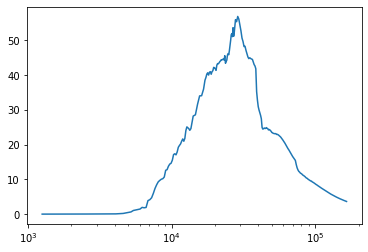

In [16]:
import matplotlib.pyplot as plt
x,y = lephare_spec(ids[0],0)
plt.plot(x[100:],y[100:])
plt.xscale('log')

In [7]:
with open('lephare_output.out','r') as f:
    lephare_output_text = f.read()